In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import re
import os

### Esecuzione Reasoning

In [39]:
reasoning = "./newReasoning.asp"
facts = ["./facts/0A00018253.04_cad.asp","./facts/IMG_4416_warp_net.asp"]
#facts = ["./facts/cad1.asp","./facts/net1.asp"]
#facts = ["./facts/prova_cad.asp","./facts/prova_net.asp"]

In [40]:
facts=' '.join(facts)
out = os.popen(f'./DLV2 {reasoning} {facts}').read()
outputReasoning = re.split(", | |\n|{|}",out)

In [41]:
filterPredicates = ["distance","relCad","absent","excess"]
filterPredicates = ["numRelationsCad","numRelationsNet","absent"]
filterPredicates = ["limitedRelNet","inLevelNet"]
for x in outputReasoning:
    for y in filterPredicates:
        if y.lower() in x.lower():
            print(x)
            break

inLevelNet("17",1,"20",2,vertical)
inLevelNet("17",1,"19",6,vertical)
inLevelNet("17",1,"22",8,vertical)
inLevelNet("17",1,"16",9,vertical)
inLevelNet("17",1,"23",10,vertical)
inLevelNet("17",1,"21",12,vertical)
inLevelNet("17",1,"15",13,vertical)
inLevelNet("20",2,"17",1,vertical)
inLevelNet("18",3,"18",7,vertical)
inLevelNet("18",3,"13",16,vertical)
inLevelNet("19",4,"14",5,vertical)
inLevelNet("19",4,"19",6,vertical)
inLevelNet("19",4,"18",7,vertical)
inLevelNet("19",4,"13",11,vertical)
inLevelNet("19",4,"15",13,vertical)
inLevelNet("14",5,"19",4,vertical)
inLevelNet("14",5,"13",11,vertical)
inLevelNet("19",6,"17",1,vertical)
inLevelNet("19",6,"19",4,vertical)
inLevelNet("19",6,"16",9,vertical)
inLevelNet("19",6,"15",13,vertical)
inLevelNet("18",7,"18",3,vertical)
inLevelNet("18",7,"19",4,vertical)
inLevelNet("18",7,"13",11,vertical)
inLevelNet("18",7,"13",16,vertical)
inLevelNet("22",8,"17",1,vertical)
inLevelNet("16",9,"17",1,vertical)
inLevelNet("16",9,"19",6,vertical)
inLevelNet

### Parsing reasoning output

In [42]:
net = []
cad = []
relNet = []
relCad = []
absentComponents = []
inExcessComponents = []
absentRelations = []
inExcessRelations = []
for x in outputReasoning:
    if "net(" in x:
        x=x.replace("net","")
        net.append(eval(x))
    elif "cad(" in x:
        x=x.replace("cad","")
        cad.append(eval(x))
    elif "limitedRelNet(" in x:
        x=x.replace("limitedRelNet","")
        relNet.append(eval(x))
    elif "limitedRelCad(" in x:
        x=x.replace("limitedRelCad","")
        relCad.append(eval(x))
    elif "absentComponent(" in x:
        x=x.replace("absentComponent","")
        absentComponents.append(eval(x))
    elif "inExcessComponent(" in x:
        x=x.replace("inExcessComponent","")
        inExcessComponents.append(eval(x))
    elif "absentRel(" in x:
        x=x.replace("absentRel","")
        absentRelations.append(eval(x))
    elif "inExcessRel(" in x:
        x=x.replace("inExcessRel","")
        inExcessRelations.append(eval(x))

### Rappresentazione visiva Grafi

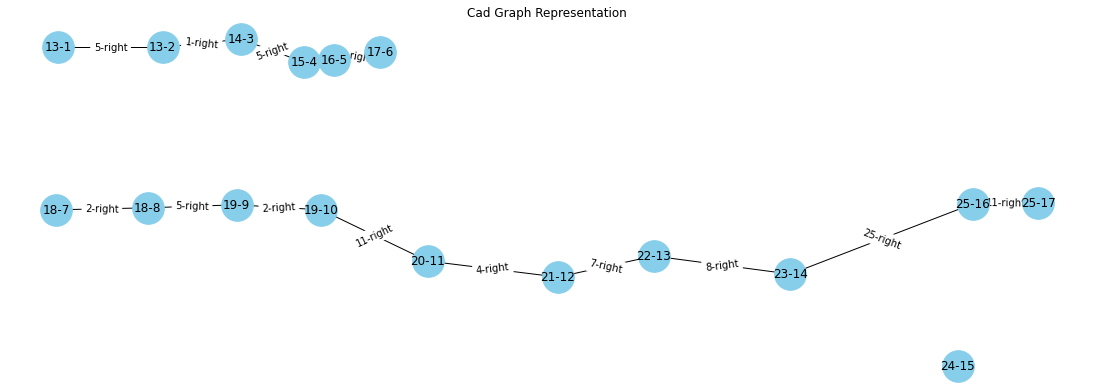

In [43]:
cadGraph = nx.Graph()
pos={}
for x in cad:
    cadGraph.add_node(f"{x[0]}-{x[1]}")
    pos[f"{x[0]}-{x[1]}"] = [x[2],x[3]]

for x in relCad:
    cadGraph.add_edge(f"{x[0]}-{x[1]}",f"{x[2]}-{x[3]}",label=f"{x[4]}-{x[5]}")
    
fig = plt.figure(figsize=(15,5))

nx.draw(cadGraph,pos,with_labels=True,node_size=1000,node_color="skyblue")
nx.draw_networkx_edge_labels(cadGraph,pos,edge_labels=nx.get_edge_attributes(cadGraph,'label'))

plt.title("Cad Graph Representation")
ax = plt.gca()
ax.invert_yaxis()
plt.show()

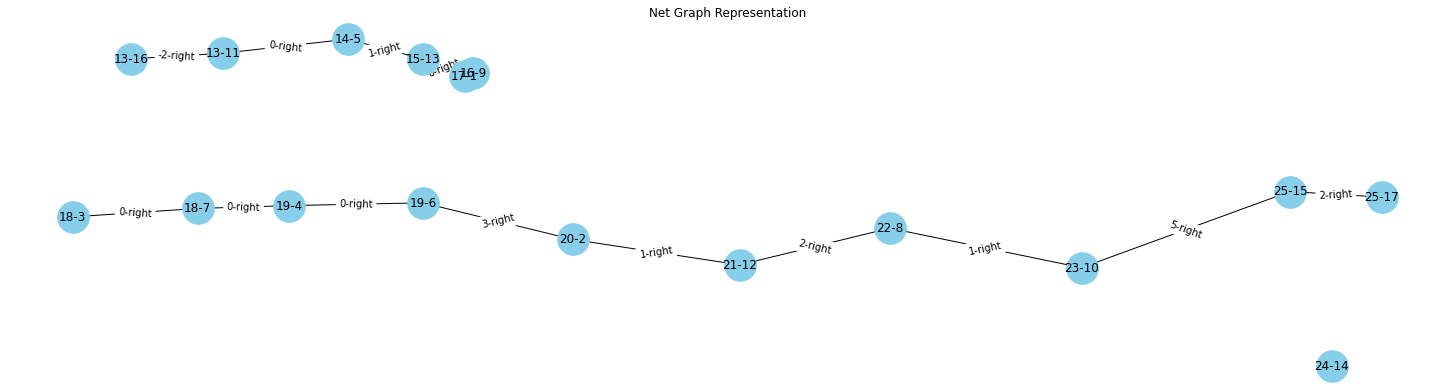

In [45]:
netGraph = nx.Graph()
pos={}
for x in net:
    netGraph.add_node(f"{x[0]}-{x[1]}")
    pos[f"{x[0]}-{x[1]}"] = [x[2],x[3]]

for x in relNet:
    netGraph.add_edge(f"{x[0]}-{x[1]}",f"{x[2]}-{x[3]}",label=f"{x[4]}-{x[5]}")
    
fig = plt.figure(figsize=(20,5))

nx.draw(netGraph,pos,with_labels=True,node_size=1000,node_color="skyblue")
nx.draw_networkx_edge_labels(netGraph,pos,edge_labels=nx.get_edge_attributes(netGraph,'label'))

plt.title("Net Graph Representation")
ax = plt.gca()
ax.invert_yaxis()
plt.show()

### Absent and Inexcess Components

In [46]:
print("\033[1mComponenti Assenti:\033[0m\n" if len(absentComponents) >0 else "",end="")
absentComponents.sort(key=lambda y:y[1])
for x in absentComponents:
    if x[1]>1:
        print(f"\t{x[1]} componenti \033[1m{x[0]}\033[0m assenti")
    if x[1]==1:
        print(f"\t{x[1]} componente \033[1m{x[0]}\033[0m assente")

In [47]:
print("\033[1mComponenti in eccesso:\033[0m\n"if len(inExcessComponents) >0 else "",end="")
inExcessComponents.sort(key=lambda y:y[1])
for x in inExcessComponents:
    if x[1]>1:
        print(f"\t{x[1]} componenti \033[1m{x[0]}\033[0m in eccesso")
    if x[1]==1:
        print(f"\t{x[1]} componente \033[1m{x[0]}\033[0m in eccesso")

### Absent and Inexcess Relations

In [48]:
print("\033[1mRelazioni Assenti:\033[0m\n" if len(absentRelations) >0 else "",end="")
absentRelations.sort(key=lambda y:y[2])
for x in absentRelations:
    if x[2]>1:
        print(f"\t{x[2]} relazioni tra componenti \033[1m{x[0]}\033[0m e \033[1m{x[1]}\033[0m assente")
    if x[2]==1:
        print(f"\t{x[2]} relazione tra componenti \033[1m{x[0]}\033[0m e \033[1m{x[1]}\033[0m assenti")

Relazioni Assenti:
	1 relazione tra componenti 16 e 17 assenti
	1 relazione tra componenti 15 e 16 assenti


In [49]:
print("\033[1mRelazioni in eccesso:\033[0m\n"if len(inExcessRelations) >0 else "",end="")
inExcessRelations.sort(key=lambda y:y[2])
for x in inExcessRelations:
    if x[2]>1:
        print(f"\t{x[2]} relazioni in eccesso tra componenti \033[1m{x[0]}\033[0m e \033[1m{x[1]}\033[0m")
    if x[2]==1:
        print(f"\t{x[2]} relazione in eccesso tra componenti \033[1m{x[0]}\033[0m e \033[1m{x[1]}\033[0m")

Relazioni in eccesso:
	1 relazione in eccesso tra componenti 15 e 17
